In [1]:
import pandas as pd 
wcat=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/wc.at.csv")
wcat.head()



,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [2]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [3]:
from scipy import stats
stats.shapiro(wcat.Waist)

ShapiroResult(statistic=0.9558578133583069, pvalue=0.001170447445474565)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d156c2cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d156c3b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d156c2c910>],
 'medians': [<matplotlib.lines.Line2D at 0x2d156c3bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d156c3beb0>],
 'means': []}

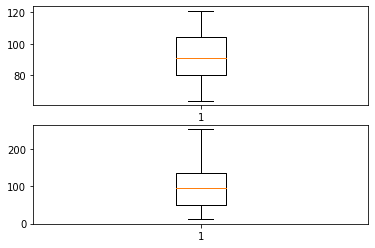

In [4]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.boxplot(wcat.Waist)
plt.subplot(2,1,2)
plt.boxplot(wcat.AT)

In [5]:
wcat.shape

(109, 2)

array([[<AxesSubplot:title={'center':'Waist'}>,
        <AxesSubplot:title={'center':'AT'}>]], dtype=object)

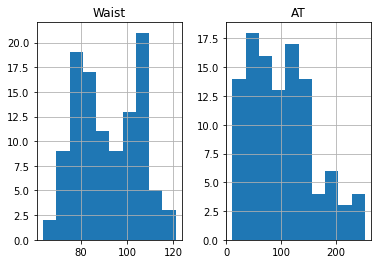

In [6]:
wcat.hist()

In [7]:
trained=wcat.iloc[:88]
trained

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
83,112.00,158.00
84,108.50,183.00
85,104.00,184.00
86,111.00,121.00


In [8]:
trained.shape

(88, 2)

In [9]:
test=wcat.iloc[88:]
test

,Waist,AT
88,121.0,245.00
89,109.0,137.00
90,97.5,165.00
91,105.5,152.00
92,98.0,181.00
93,94.5,80.95
94,97.0,137.00
95,105.0,125.00
96,106.0,241.00
97,99.0,134.00


In [10]:
test.shape

(21, 2)

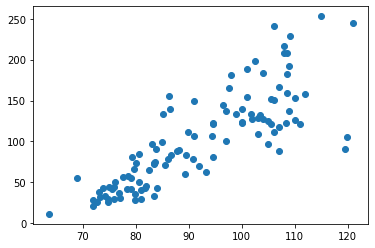

In [11]:
plot=plt.scatter(wcat.Waist,wcat.AT )

In [12]:
from scipy.stats import pearsonr
pearsonr(wcat.Waist,wcat.AT)
# corelation coefficient
# stength of the 
# -1-0.9 or +0.9+1 strong
# -0.9-0.7 0r +0.9+0.7 Moderate 
# others are weak 
# out put (correlation,p value )

(0.8185578128958533, 1.6186065693841312e-27)

In [13]:
import statsmodels.api as sm

In [14]:
trained_x=trained.Waist
trained_y=trained.AT
trained_x=sm.add_constant(trained_x)
trained_x.head()


C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Waist
0,1.0,74.75
1,1.0,72.60
2,1.0,81.80
3,1.0,83.95
4,1.0,74.65


In [15]:
model=sm.OLS(trained_y,trained_x).fit()


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.26e-22
Time:                        09:12:31   Log-Likelihood:                -415.28
No. Observations:                  88   AIC:                             834.6
Df Residuals:                      86   BIC:                             839.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.1353     19.906     -8.447      0.000    -207.707    -128.564
Waist          2.8540      0.221     12.928      0.000       2.415       3.293
==============================================================================
Omnibus:                        6.435   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.863
Skew:                           0.328   Prob(JB):                       0.0196
Kurtosis:                       4.309   Cond. No.                         614.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

const   -168.135268
Waist      2.854038
dtype: float64

In [18]:
test_x=test.Waist
test_y=test.AT
test_x=sm.add_constant(test_x)
test_x.head()

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Waist
88,1.0,121.0
89,1.0,109.0
90,1.0,97.5
91,1.0,105.5
92,1.0,98.0


In [28]:
predval=model.predict(trained_x)

In [ ]:
;

<AxesSubplot:xlabel='Waist', ylabel='AT'>

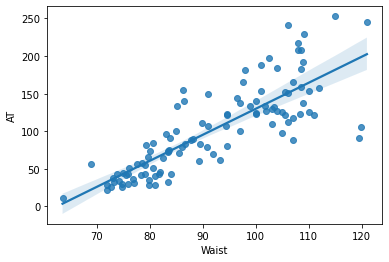

In [21]:
import seaborn as sns
sns.regplot(x='Waist',y='AT',data=wcat)


<AxesSubplot:xlabel='Waist', ylabel='AT'>

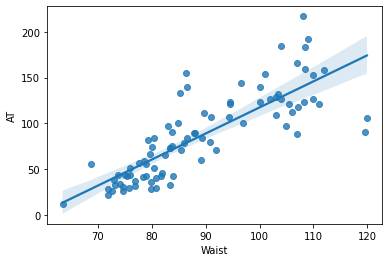

In [22]:
sns.regplot(x='Waist',y='AT',data=trained)




<AxesSubplot:xlabel='Waist', ylabel='AT'>

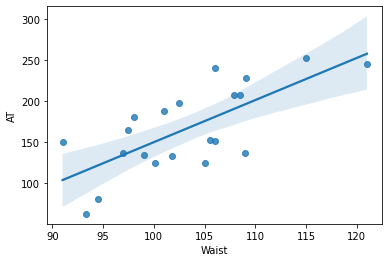

In [23]:
sns.regplot(x='Waist',y='AT',data=test)

<AxesSubplot:xlabel='Waist', ylabel='AT'>

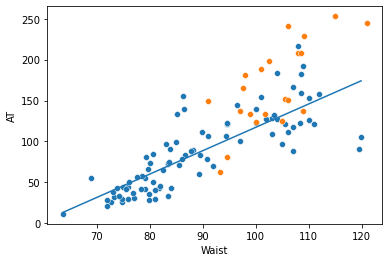

In [29]:
sns.scatterplot(x=trained.Waist,y=trained.AT)
sns.scatterplot(x=test.Waist,y=test.AT)
sns.lineplot(x=trained.Waist,y=predval)